# Exercise 10: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In this exercise we will have a look at Support Vector Machines.  
The following datasets will be used in this exercise. You can visualize them if you want. If you do you will see that they can be easily divided into three classes at a glance. However SVMs can only differentiate between two classes. To achieve a classification via SVM on the given dataset we will use the **one vs. one** and the **one vs. rest** methods.

**Note:** preprocessing may be necessary

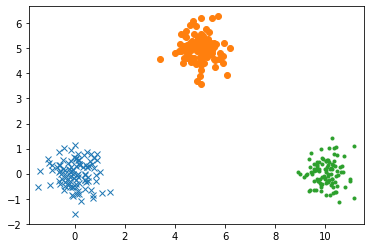

In [2]:
x1, y1 = np.random.multivariate_normal([0, 0], [[0.25, 0], [0, 0.25]] , 100).T
x2, y2 = np.random.multivariate_normal([5,5], [[0.25, 0], [0, 0.25]] , 100).T
x3, y3 = np.random.multivariate_normal([10,0], [[0.25, 0], [0, 0.25]] , 100).T

c1 = np.array(["A"]*100)
c2 = np.array(["B"]*100)
c3 = np.array(["C"]*100)

x = np.concatenate([x1,x2,x3]) 
y = np.concatenate([y1,y2,y3]) 
c = np.concatenate([c1,c2,c3])

df = pd.DataFrame(data={"x":x, "y":y, "c":c})

plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'o')
plt.plot(x3, y3, '.')
plt.axis('equal')
plt.show()

## Using SVMs one vs. one

In one vs. one classification each pair of classes is evaluated via SVM.  
Use the SVM implementation of scikit-learn, specifically SVC, to compare all pairs of classes, and create classifiers for each. **Choose the linear kernel function.**

You can find the documentation of SVC [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

In [3]:
# #add code for one vs. one 
from sklearn.svm import SVC

# For Class A and B
df_temp=df[df['c'].isin(["A","B"])]

clf_A_B = SVC(kernel='linear',decision_function_shape='ovr')
clf_A_B.fit(df_temp[['x','y']], df_temp['c'])

# For Class B and C
df_temp = df[df['c'].isin(["B","C"])]

clf_B_C = SVC(kernel='linear')
clf_B_C.fit(df_temp[['x','y']], df_temp['c'])

# For Class C and D
df_temp = df[df['c'].isin(["C","A"])]

clf_C_A = SVC(kernel='linear')
clf_C_A.fit(df_temp[['x','y']], df_temp['c'])


SVC(kernel='linear')

Visualize the decision function on the dataset.

/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


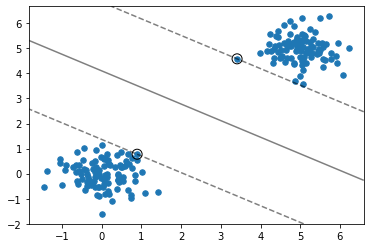

In [4]:
#add code for visualization
# support_vectors = clf_A_B.support_vectors_
df_temp=df[df['c'].isin(["A","B"])]

plt.scatter(df_temp['x'], df_temp['y'], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_A_B.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf_A_B.support_vectors_[:, 0],
    clf_A_B.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


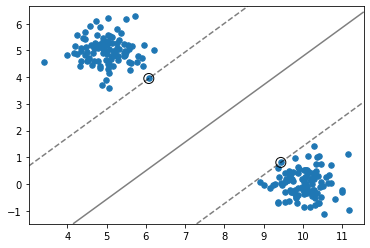

In [5]:
df_temp=df[df['c'].isin(["B","C"])]

plt.scatter(df_temp['x'], df_temp['y'], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_B_C.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf_B_C.support_vectors_[:, 0],
    clf_B_C.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


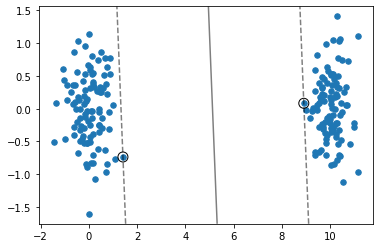

In [6]:
df_temp=df[df['c'].isin(["C","A"])]

plt.scatter(df_temp['x'], df_temp['y'], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_C_A.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf_C_A.support_vectors_[:, 0],
    clf_C_A.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [7]:
df['c'] = df["c"].replace("A",1)
df["c"] = df["c"].replace("B",2)
df["c"] = df["c"].replace("C",3)


/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot:>

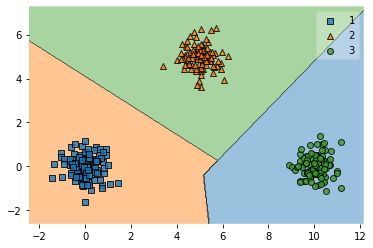

In [8]:
from mlxtend.plotting import plot_decision_regions

ovo_model = SVC(kernel = 'linear', gamma='auto',decision_function_shape = 'ovo').fit(df[['x','y']], df['c'])

plot_decision_regions(df[['x','y']].to_numpy(), df['c'].to_numpy(), clf=ovo_model, legend=1)

## Using SVMs one vs. rest

In one vs. rest classification each class is compared against the rest of the data and evaluated via SVM.  
Use the SVM implementation of scikit-learn, specifically SVC, to calculate a classifier for each class compared to the rest of the dataset. 

In [9]:
from sklearn.multiclass import OneVsRestClassifier

#add code for one vs. rest 
model = OneVsRestClassifier(SVC(kernel="linear"))
# model = SVC(kernel="linear",decision_function_shape='ovr')
model.fit(df[['x','y']],df['c'])

OneVsRestClassifier(estimator=SVC(kernel='linear'))

Visualize the decision function on the dataset.

/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/akshat/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


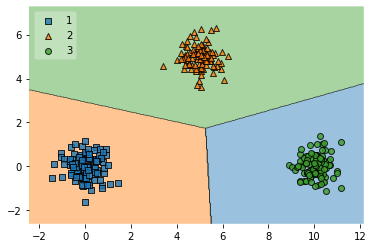

In [10]:
from mlxtend.plotting import plot_decision_regions
df["c"] = df["c"].replace("A",1)
df["c"] = df["c"].replace("B",2)
df["c"] = df["c"].replace("C",3)
df["c"]

plot_decision_regions(df[['x','y']].to_numpy(), df['c'].to_numpy(), clf=model, legend=2)
plt.show()